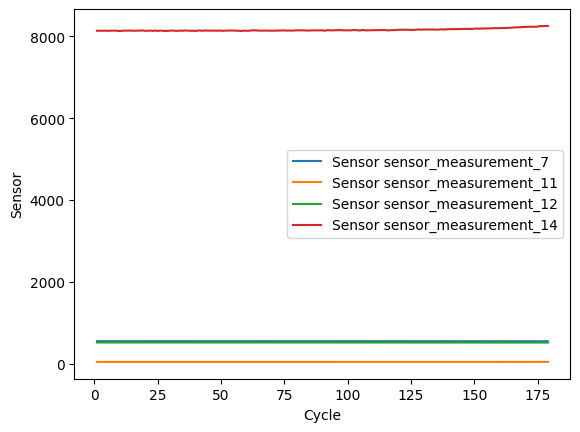

In [85]:
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt


pd.set_option("display.max.columns", 100)
pd.set_option("display.width", 100)
df = pd.read_csv("../data/CMAPSS/train_FD001.txt", 
                 sep=r'\s+', 
                 header=None)
#add the columns
col_names = (
    ["unit_number", "time_in_cycles",
     "operational_setting_1", "operational_setting_2", "operational_setting_3"]
    + [f"sensor_measurement_{i}" for i in range(1, 22)])
df.columns = col_names
df["RUL"] = df.groupby("unit_number")["time_in_cycles"].transform(lambda s : s.max() - s )

sensors = ["sensor_measurement_7", "sensor_measurement_11", "sensor_measurement_12", "sensor_measurement_14"]
engine_id = 3 
subset = df[df.unit_number == engine_id]
for sensor in sensors:
    plt.plot(subset.time_in_cycles, subset[sensor], label=f"Sensor {sensor}")
plt.xlabel("Cycle")
plt.ylabel("Sensor")
plt.legend()
plt.show()

    


# print(df[df["unit_number"] == 23]) #checking RULS per engine number
# print(df.shape)
# print(df.info())